# Homework 2

## by Dion Ho


# Import Python Libraries

In [1]:
import numpy as np
import math
from math import pi
from math import factorial
from matplotlib import pyplot as plt
%matplotlib inline

## Defining Newton's Method (with $\frac{|p_n - p_{n-1}|}{|p_n|} \leq \epsilon$ stopping criteria)

In [2]:
def newton_method_stop2(x0,f,fp,tol,N):
    F = f(x0)
    Fp = fp(x0)
    iteration = 1
    print ("iter      grad         root:(x,_)           root:(_,y)        interval length")
    print ("------------------------------------------------------------------------------")
    x = (Fp*x0 - F)/Fp #We run one iteration to get a x1 and (x0-x1) value.
    x1 = x0 #x1 is the p_{n-1} value; sorry its a misnomer, I'm lazy to change it.
    x0 = x
    F = f(x0)
    Fp = fp(x0)
    print('{:>3d}  {:> 10.5f}  {:> 22.16f}  {:>13.6e}'.format(1, Fp, x, np.abs(F), np.abs(x0-x1)))
    iteration = iteration + 1
    while (iteration<=N) & (np.abs(x0-x1)>np.abs(tol*x1)):
        x = (Fp*x0 - F)/Fp
        x1 = x0
        x0 = x
        F = f(x0)
        Fp = fp(x0)
        print('{:>3d}  {:> 10.5f}  {:> 22.16f}  {:>13.6e}  {:> 22.16f}'.format(iteration, Fp, x, np.abs(F),np.abs(x0-x1)))
        iteration = iteration + 1
    if np.abs(x-x0)<=np.abs(tol*x1):
        return x0
    else:
        print("Method failed to converge. Try harder!")

## Q1

In [3]:
#(a)
f = lambda x: x**2 - 2*x*np.exp(-x) + np.exp(-2*x)
fp = lambda x: 2*np.exp(-2*x)*(np.exp(x) + 1)*(np.exp(x)*x - 1)
newton_method_stop2(0.3,f,fp,1e-5,50)

iter      grad         root:(x,_)           root:(_,y)        interval length
------------------------------------------------------------------------------
  1    -0.74737      0.4266123640724216   5.112309e-02
  2    -0.36873      0.4950161565011499   1.312053e-02      0.0684037924287283
  3    -0.18314      0.5305988085889202   3.323961e-03      0.0355826520877702
  4    -0.09126      0.5487488825747814   8.365522e-04      0.0181500739858612
  5    -0.04555      0.5579153030281038   2.098384e-04      0.0091664204533224
  6    -0.02276      0.5625215706913647   5.254747e-05      0.0046062676632609
  7    -0.01137      0.5648304952776271   1.314787e-05      0.0023089245862624
  8    -0.00569      0.5659864085549946   3.288345e-06      0.0011559132773675
  9    -0.00284      0.5665647283514305   8.222583e-07      0.0005783197964359
 10    -0.00142      0.5668539790905128   2.055861e-07      0.0002892507390824
 11    -0.00071      0.5669986271766673   5.139922e-08      0.000144648086154

0.5671387694550161

In [4]:
#(b)
f = lambda x: np.cos(x + 2**0.5) + x*(x/2 + 2**0.5)
fp = lambda x: x - np.sin(x + 2**0.5) + 2**0.5
newton_method_stop2(-1.1,f,fp,1e-5,50)

iter      grad         root:(x,_)           root:(_,y)        interval length
------------------------------------------------------------------------------
  1     0.00217     -1.1786828328725436   1.279900e-04
  2     0.00092     -1.2376200000887663   4.047965e-05      0.0589371672162227
  3     0.00039     -1.2817913472216889   1.280496e-05      0.0441713471329226
  4     0.00016     -1.3149065788863532   4.051027e-06      0.0331152316646643
  5     0.00007     -1.3397374059706373   1.281674e-06      0.0248308270842841
  6     0.00003     -1.3583581664428563   4.055124e-07      0.0186207604722191
  7     0.00001     -1.3723227415318771   1.283036e-07      0.0139645750890207
  8     0.00001     -1.3827957530364929   4.059552e-08      0.0104730115046159
  9     0.00000     -1.3906503345627994   1.284458e-08      0.0078545815263065
 10     0.00000     -1.3965411959453928   4.064088e-09      0.0058908613825934
 11     0.00000     -1.4009593103716593   1.285900e-09      0.004418114426266

-1.4139847160008898

In [5]:
#(c)
f = lambda x: np.exp(3*x) - 27*x**6 + 27*(x**4)*np.exp(x) - 9*(x**2)*np.exp(2*x)
fp = lambda x: 3*(np.exp(x) - 6*x)*(np.exp(x) - 3*x**2)**2
newton_method_stop2(4,f,fp,1e-5,50)

iter      grad         root:(x,_)           root:(_,y)        interval length
------------------------------------------------------------------------------
  1   1670.46877      3.9281203817224708   9.240626e+01
  2   707.45522      3.8728028181894754   2.925066e+01      0.0553175635329954
  3   303.10091      3.8314565077979177   9.122787e+00      0.0413463103915577
  4   131.11907      3.8013583241816207   2.809005e+00      0.0300981836162970
  5    57.15513      3.7799350098217919   8.559359e-01      0.0214233143598288
  6    25.05798      3.7649593487547013   2.587117e-01      0.0149756610670906
  7    11.03217      3.7546348218974384   7.772826e-02      0.0103245268572629
  8     4.87160      3.7475892211112494   2.325202e-02      0.0070456007861890
  9     2.15568      3.7428162429994458   6.934561e-03      0.0047729781118035
 10     0.95525      3.7395993586017480   2.063773e-03      0.0032168843976979
 11     0.42371      3.7374388973757022   6.133084e-04      0.00216046122604

3.7331297169957813

## Q2(a)

If p is a root of $f(x) = 0$ with multiplicity $m$, then
$$f(x) = g(x)(h(x) - h(p))^m \mbox{ where } g(p) \neq 0.$$

This implies that

$\begin{align*}
f'(x) &= g'(x)(h(x) - h(p))^m + mg(x)h'(x)(h(x) - h(p))^{m-1} \\
&= (g'(x)(h(x) - h(p)) - mg(x)(h'(x))(h(x) - h(p)^{m-1}) \\
&= g_1(x)(h(x) - h(p))^{m-1}.
\end{align*}$

Therefore, $f^{(k)}(x) = g_k(x)(h(x) - h(p))^{m-k}$ for $1 \leq k \leq m-1$.

Therefore, $f(p) = 0, f'(p) = 0, \ldots, f^{(m-1)}(p) = 0.$

According to Burden and Faires, quadratic convergence might not occur if $f(p) = 0$ and $f'(p) = 0$.

If we let $g(x) = x - \phi(x)f(x)$, then $g'(x) = 1 - \phi'(x)f(x) -  \phi(x)f'(x)$. However, if $f'(p) = 0$, then $g'(x) = 1$ for all function $\phi$. $g'(x) \neq 0$ implies linear convergence of any fixed point iteration scheme.

## Defining Newton's method with multiplicity of root correction

In [6]:
def newton_method_stop2_mulcorrection(x0,f,fp,fpp,tol,N):
    F = f(x0)
    Fp = fp(x0)
    Fpp = fpp(x0)
    iteration = 1
    print ("iter      divisor         root:(x,_)           root:(_,y)        interval length")
    print ("------------------------------------------------------------------------------")
    x = x0 - Fp*F/(Fp**2 - F*Fpp) #We run one iteration to get a x1 and (x0-x1) value.
    x1 = x0 #x1 is the p_{n-1} value; sorry its a misnomer, I'm lazy to change it.
    x0 = x
    F = f(x0)
    Fp = fp(x0)
    Fpp = fpp(x0)
    print('{:>3d}  {:> 10.5f}  {:> 22.16f}  {:>13.6e}'.format(1, Fp, x, np.abs(F), np.abs(x0-x1)))
    iteration = iteration + 1
    while (iteration<=N) & (np.abs(x0-x1)>np.abs(tol*x1)):
        x = x0 - Fp*F/(Fp**2 - F*Fpp)
        x1 = x0
        x0 = x
        F = f(x0)
        Fp = fp(x0)
        Fpp = fpp(x0)
        print('{:>3d}  {:> 10.5f}  {:> 22.16f}  {:>13.6e}  {:> 22.16f}'.format(iteration, (Fp**2 - F*Fpp), x, np.abs(F),np.abs(x0-x1)))
        iteration = iteration + 1
    if np.abs(x-x0)<=np.abs(tol*x1):
        return x0
    else:
        print("Method failed to converge. Try harder!")

## Defining Bisection Method but with results stored in an array

In [7]:
def bisection_method_withresults(a,b,f,tol,N):
    FA,FB = f(a), f(b)
    results=[]
    iteration = 1
    if FA*FB<0:
        print ("iter      a           b            root:(x,_)           root:(_,y)")
        print ("------------------------------------------------------------------")
        p = (a + b)/2
        FP = f(p)
        while (np.abs((b-a)/2)>tol) & (iteration <= N):
            if FA*FP<0:
                b=p
                FB=FP
            else:
                a=p
                FA=FP
            p = (a+b)/2
            FP = f(p)
            print('{:>3d}  {:> 10.5f}  {:> 10.5f}  {:> 22.16f}  {:>13.6e}'.format(iteration, a, b, p, abs(FP)))
            results.append(p)
            iteration = iteration + 1
        if np.abs((b-a)/2)>tol:
            print("Method failed to converge")
        else:
            return p, results
    else:
             print("Cannot ensure existence of root")

In [8]:
#(a)
f = lambda x: x**2 - 2*x*np.exp(-x) + np.exp(-2*x)
fp = lambda x: 2*np.exp(-2*x)*(np.exp(x) + 1)*(np.exp(x)*x - 1)
fpp = lambda x: -2*np.exp(-x)*(x-2) + 4*np.exp(-2*x) + 2
newton_method_stop2_mulcorrection(0.3,f,fp,fpp,1e-5,50)

iter      divisor         root:(x,_)           root:(_,y)        interval length
------------------------------------------------------------------------------
  1     0.08112      0.5838083972615007   6.779926e-04
  2     0.00000      0.5671927362614900   6.004397e-09      0.0166156610000107
  3     0.00000      0.5671432908508617   5.551115e-17      0.0000494454106283
  4    -0.00000      0.5671432912844749   5.551115e-17      0.0000000004336133


0.5671432912844749

In [9]:
#(b)
f = lambda x: np.cos(x + 2**0.5) + x*(x/2 + 2**0.5)
fp = lambda x: x - np.sin(x + 2**0.5) + 2**0.5
fpp = lambda x: 1 - np.cos(x + 2**0.5)
newton_method_stop2_mulcorrection(-1.1,f,fp,fpp,1e-5,50)

iter      divisor         root:(x,_)           root:(_,y)        interval length
------------------------------------------------------------------------------
  1     0.00000     -1.4131816691807593   4.718448e-14
  2     0.00000     -1.4142085583550834   1.110223e-16      0.0010268891743241
  3     0.00000     -1.4142085583550834   1.110223e-16      0.0000000000000000


-1.4142085583550834

In [10]:
#(c)
f = lambda x: np.exp(3*x) - 27*x**6 + 27*(x**4)*np.exp(x) - 9*(x**2)*np.exp(2*x)
fp = lambda x: 3*(np.exp(x) - 6*x)*(np.exp(x) - 3*x**2)**2
fpp = lambda x: 6*(np.exp(x) - 3*x**2)*(np.exp(x) - 6*x)**2 + 3*(np.exp(x) - 6)*(np.exp(x) - 3*x**2)**2
newton_method_stop2_mulcorrection(4,f,fp,fpp,1e-5,50)

iter      divisor         root:(x,_)           root:(_,y)        interval length
------------------------------------------------------------------------------
  1    65.06103      3.6720356968913230   1.403597e+00
  2     0.02357      3.7295805255521182   3.100712e-04      0.0575448286607951
  3     0.00000      3.7330677255408902   2.910383e-11      0.0034871999887720
  4    -0.00000      3.7330640655685072   5.820766e-11      0.0000036599723829


3.7330640655685072

For all three functions in Q1, Newton's Method with multiplicity of root correction results in faster convergence. In fact, for 1(c) and especially 1(b), the convergence appears to be faster than quadratic.

## Q3

Consider the sequence $\displaystyle\left(p_{n+1} = p_n^3 \mbox{ with } p_0 = 0.5\right)_{n \in \mathbb{N}^0},$ i.e. $\displaystyle\left(2^{-3^n}\right)_{n \in \mathbb{N}^0}$. This sequence converges to $0$.

Let $\alpha = 3$ in $\displaystyle\lim_{n\rightarrow\infty}\frac{\mid p_{n+1} - p \mid}{\mid p_{n} - p \mid^\alpha} = \lambda$. $\displaystyle\lim_{n\rightarrow\infty}\frac{\mid p_{n+1}\mid}{\mid p_{n}\mid^3} = \lambda \implies \lim_{n\rightarrow\infty}\frac{\mid p_{n}\mid^3}{\mid p_{n}\mid^3} = \lambda \implies \lambda = 1$. 
Therefore, the sequence converges to $0$ with order $3$.

## Q4(a)

The error of the bisection algorithm is the length of the interval which is given by the sequence $\displaystyle\left(p_{n+1} = 0.5p_n \mbox{ with } p_0 = \mbox{some } \mathbb{R}^+\right)$, i.e. $\displaystyle\left(\frac{a}{2^n} \mbox{ for some } a\in\mathbb{R}^+\right)_{n \in \mathbb{N}^0}$. This sequence converges to $0$.

Let $\alpha = 1$ in $\displaystyle\lim_{n\rightarrow\infty}\frac{\mid p_{n+1} - p \mid}{\mid p_{n} - p \mid^\alpha} = \lambda$. $\displaystyle\lim_{n\rightarrow\infty}\frac{\mid p_{n+1}\mid}{\mid p_{n}\mid} = \lambda \implies \lim_{n\rightarrow\infty}\frac{\mid 0.5p_{n}\mid}{\mid p_{n}\mid} = \lambda \implies \lambda = 0.5$. 
Therefore, the sequence converges linearly to $0$.

## Q4(b)

iter      a           b            root:(x,_)           root:(_,y)
------------------------------------------------------------------
  1     3.00000     4.00000      3.5000000000000000   4.801216e+01
  2     3.50000     4.00000      3.7500000000000000   3.711999e-02
  3     3.50000     3.75000      3.6250000000000000   6.828201e+00
  4     3.62500     3.75000      3.6875000000000000   6.100351e-01
  5     3.68750     3.75000      3.7187500000000000   2.067434e-02
  6     3.71875     3.75000      3.7343750000000000   1.597218e-05
  7     3.71875     3.73438      3.7265625000000000   1.987165e-03
  8     3.72656     3.73438      3.7304687500000000   1.291051e-04
  9     3.73047     3.73438      3.7324218750000000   2.071203e-06
 10     3.73242     3.73438      3.7333984375000000   2.384768e-07
 11     3.73242     3.73340      3.7329101562500000   3.518653e-08
 12     3.73291     3.73340      3.7331542968750000   3.085006e-09
 13     3.73291     3.73315      3.7330322265625000   7.566996

<function matplotlib.pyplot.grid(b=None, which='major', axis='both', **kwargs)>

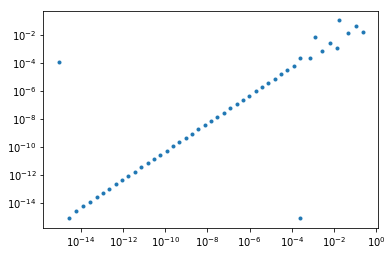

In [11]:
f = lambda x: np.exp(3*x) - 27*x**6 + 27*(x**4)*np.exp(x) - 9*(x**2)*np.exp(2*x)
p, results = bisection_method_withresults(3,5,f,1e-15,100)
plot=[[],[]]
for i in range(0, len(results)-1):
    plot[0].append(np.abs(results[i]-p))
    plot[1].append(np.abs(results[i+1]-p))
plt.loglog(plot[0],plot[1], '.') #Apart from a few anomalous plots, the convergence is linear.
plt.grid

## Q5

Suppose sequence $(p_n)$ converges to $p$ of order $\alpha$ and $n$ is large. Therefore, $\displaystyle\frac{| p_{n+1} - p|}{| p_n - p|^\alpha} \approx \lambda \implies \frac{| p_n - p|}{| p_{n-1} - p|^\alpha} \approx \lambda$. 

$\displaystyle\frac{| p_n - p|}{| p_{n-1} - p|^\alpha} \approx \lambda \implies \left(\frac{1}{\lambda}| p_n - p|\right)^{1/\alpha} \approx | p_{n-1} - p|$.

Given $| p_{n+1} - p| \approx C | p_n - p|| p_{n-1} - p|$, we have $\displaystyle| p_{n+1} - p| \approx C\left(\frac{1}{\lambda}\right)^{1/\alpha}|p_n - p|^{1/\alpha}|p_n - p| \implies \frac{| p_{n+1} - p|}{| p_n - p|^{1+1/\alpha}} \approx C\left(\frac{1}{\lambda}\right)^{1/\alpha}$.

Since $\displaystyle C\left(\frac{1}{\lambda}\right)^{1/\alpha}$ is a positive constant, $\displaystyle\frac{1+\alpha}{\alpha} = \alpha \implies \alpha^2 - \alpha - 1 = 0 \implies \alpha = \frac{1 + \sqrt{5}}{2} \approx 1.618$ since $\alpha > 0$.

## Accelerating Convergence: Q1

## Defining Newton's Method (with $|p_n - p_{n-1}| \leq \epsilon$ stopping criteria)

In [12]:
def newton_method_stop1(x0,f,fp,tol,N):
    F = f(x0)
    Fp = fp(x0)
    results=[]
    iteration = 1
    print ("iter      grad         root:(x,_)           root:(_,y)        interval length")
    print ("------------------------------------------------------------------------------")
    x = (Fp*x0 - F)/Fp #We run one iteration to get a (x0-x1) value, though if we immediately get the root, we will just return it.
    results.append(x)
    x1 = x0 #x1 is the p_{n-1} value; sorry its a misnomer, I'm lazy to change it.
    x0 = x
    F = f(x0)
    Fp = fp(x0)
    print('{:>3d}  {:> 10.5f}  {:> 22.16f}  {:>13.6e}  {:> 22.16f}'.format(1, Fp, x, np.abs(F),np.abs(x0-x1)))
    if np.abs(F)<=tol:
        return x0
    else:
        iteration = iteration + 1
        while (iteration<=N) & (np.abs(x0-x1)>tol):
            x = (Fp*x0 - F)/Fp
            results.append(x)
            x1 = x0
            x0 = x
            F = f(x0)
            Fp = fp(x0)
            print('{:>3d}  {:> 10.5f}  {:> 22.16f}  {:>13.6e}  {:> 22.16f}'.format(iteration, Fp, x, np.abs(F),np.abs(x0-x1)))
            iteration = iteration + 1
        if np.abs(x-x0)<=tol:
            return x0, results
        else:
            print("Method failed to converge. Try harder!")

In [13]:
f = lambda x: np.exp(6*x) + 3*(np.log(2)**2)*np.exp(2*x) - np.log(8)*np.exp(4*x) - np.log(2)**3
fp = lambda x: 6*np.exp(6*x) + 6*(np.log(2)**2)*np.exp(2*x) - 4*np.log(8)*np.exp(4*x)
newton_method_stop1(0,f,fp,0.0002,100);

iter      grad         root:(x,_)           root:(_,y)        interval length
------------------------------------------------------------------------------
  1     0.23802     -0.0511421365733425   9.211568e-03      0.0511421365733425
  2     0.10164     -0.0898424758150268   2.886715e-03      0.0387003392416843
  3     0.04388     -0.1182447360258248   8.915830e-04      0.0284022602107980
  4     0.01910     -0.1385655958400078   2.721970e-04      0.0203208598141830
  5     0.00837     -0.1528161929692974   8.237076e-05      0.0142505971292896
  6     0.00368     -0.1626602525902589   2.476594e-05      0.0098440596209615
  7     0.00163     -0.1693861756223201   7.412004e-06      0.0067259230320612
  8     0.00072     -0.1739460644747723   2.211159e-06      0.0045598888524522
  9     0.00032     -0.1770208137708657   6.581784e-07      0.0030747492960934
 10     0.00014     -0.1790864552280062   1.956199e-07      0.0020656414571405
 11     0.00006     -0.1804706766816483   5.808176e-0

## Aitken's Method

In [14]:
f = lambda x: np.exp(6*x) + 3*(np.log(2)**2)*np.exp(2*x) - np.log(8)*np.exp(4*x) - np.log(2)**3
fp = lambda x: 6*np.exp(6*x) + 6*(np.log(2)**2)*np.exp(2*x) - 4*np.log(8)*np.exp(4*x)
p, results = newton_method_stop1(0,f,fp,0.0002,100)
results_Atkin=np.zeros(len(results))
print("")
for n in range(1,len(results)):
    if n>=2:
        results_Atkin[n-2] = results[n-2] - (results[n-1]-results[n-2])**2/(results[n]-2*results[n-1]-results[n-2])
        print("%3d      % 3.15f        % 3.15f" %(n-2,results[n-2],results_Atkin[n-2])) #There is almost no improvement in convergence.

iter      grad         root:(x,_)           root:(_,y)        interval length
------------------------------------------------------------------------------
  1     0.23802     -0.0511421365733425   9.211568e-03      0.0511421365733425
  2     0.10164     -0.0898424758150268   2.886715e-03      0.0387003392416843
  3     0.04388     -0.1182447360258248   8.915830e-04      0.0284022602107980
  4     0.01910     -0.1385655958400078   2.721970e-04      0.0203208598141830
  5     0.00837     -0.1528161929692974   8.237076e-05      0.0142505971292896
  6     0.00368     -0.1626602525902589   2.476594e-05      0.0098440596209615
  7     0.00163     -0.1693861756223201   7.412004e-06      0.0067259230320612
  8     0.00072     -0.1739460644747723   2.211159e-06      0.0045598888524522
  9     0.00032     -0.1770208137708657   6.581784e-07      0.0030747492960934
 10     0.00014     -0.1790864552280062   1.956199e-07      0.0020656414571405
 11     0.00006     -0.1804706766816483   5.808176e-0

## Interpolation: Q1

### Defining Lagrange Polynomial Interpolation

In [15]:
def L(xvals,kk,x):
    value = np.ones(x.size)
    n = xvals.size
    for ii in range(0,n):
        if ii != kk:
            value *= (x-xvals[ii])/(xvals[kk]-xvals[ii])
    return value
    
def p_Lagrange(xvals,yvals,x):
    n = yvals.size
    pLagrange = np.zeros(x.size)
    for kk in range(0,n):
        pLagrange += yvals[kk]*L(xvals,kk,x)
    return pLagrange

In [16]:
# 1(a)
f = lambda x: np.cos(x)
xvals = np.array([0, .6, .9])
x = np.array([0.45])
yvals = f(xvals)
estimate = p_Lagrange(xvals,yvals,x)[0] #Estimate
abs_error = np.abs(estimate - f(x[0])) #
print('Estimate = {:<1.3f}; Absolute Error = {:<1.3e}'.format(estimate,abs_error))

Estimate = 0.898; Absolute Error = 2.347e-03


In [17]:
# 1(b)
f = lambda x: np.sqrt(1+x)
xvals = np.array([0, .6, .9])
x = np.array([0.45])
yvals = f(xvals)
estimate = p_Lagrange(xvals,yvals,x)[0] #Estimate
abs_error = np.abs(estimate - f(x[0])) #
print('Estimate = {:<1.3f}; Absolute Error = {:<1.3e}'.format(estimate,abs_error))

Estimate = 1.203; Absolute Error = 7.357e-04


In [18]:
# 1(c)
f = lambda x: np.log(np.abs(1+x))
xvals = np.array([0, .6, .9])
x = np.array([0.45])
yvals = f(xvals)
estimate = p_Lagrange(xvals,yvals,x)[0] #Estimate
abs_error = np.abs(estimate - f(x[0])) #
print('Estimate = {:<1.3f}; Absolute Error = {:<1.3e}'.format(estimate,abs_error))

Estimate = 0.368; Absolute Error = 3.273e-03


In [19]:
# 1(d)
f = lambda x: np.tan(x)
xvals = np.array([0, .6, .9])
x = np.array([0.45])
yvals = f(xvals)
estimate = p_Lagrange(xvals,yvals,x)[0] #Estimate
abs_error = np.abs(estimate - f(x[0])) #
print('Estimate = {:<1.3f}; Absolute Error = {:<1.3e}'.format(estimate,abs_error))

Estimate = 0.455; Absolute Error = 2.844e-02


## Q2

$\displaystyle P'_n(x) = \sum_{k=0}^n f(x_k)L'_{n,k}(x)$ since $f(x_k)$ is just a constant. We want to find a formula for $L'_{n,k}(x)$.

$\displaystyle\ln(L_{n,k}(x)) = \sum_{j=0,j\neq k}^n \ln\frac{x - x_j}{x_k - x_j} \implies \frac{d}{dx}\ln(L_{n,k}(x)) = \frac{L'_{n,k}(x)}{L_{n,k}(x)} = \sum_{j=0,j\neq k}^n \frac{1}{x_k - x_j}\frac{x_k - x_j}{x - x_j} = \sum_{j=0,j\neq k}^n \frac{1}{x - x_j}$.

Therefore, $\displaystyle L'_{n,k}(x) = L_{n,k}(x)\left(\sum_{j=0,j\neq k}^n \frac{1}{x - x_j}\right)$.

In [20]:
def L(xvals,kk,x):
    value = np.ones(x.size)
    n = xvals.size
    for ii in range(0,n):
        if ii != kk:
            value *= (x-xvals[ii])/(xvals[kk]-xvals[ii])
    return value

def LpSum(xvals,kk,x):
    lval = np.zeros(x.size)
    n = xvals.size
    for ii in range(0,n):
        if ii != kk:
            lval += 1/(x-xvals[ii])
    return lval

def p_LagrangeP(xvals,fvals,x):
    n = fvals.size
    pLagrange = np.zeros(x.size)
    for kk in range(0,n):
        pLagrange += fvals[kk]*L(xvals,kk,x)*LpSum(xvals,kk,x)
    return pLagrange

In [21]:
# 2(a)
f = lambda x: np.cos(x)
fp = lambda x: -np.sin(x)
xvals = np.array([0, .6, .9])
x = np.array([0.45])
yvals = f(xvals)
estimate = p_LagrangeP(xvals,yvals,x)[0] #Estimate
abs_error = np.abs(estimate - fp(x[0])) #
print('Estimate = {:<1.3f}; Absolute Error = {:<1.3e}'.format(estimate,abs_error))

Estimate = -0.420; Absolute Error = 1.453e-02


In [22]:
# 2(b)
f = lambda x: np.sqrt(1+x)
fp = lambda x: 0.5*np.sqrt(1/(1+x))
xvals = np.array([0, .6, .9])
x = np.array([0.45])
yvals = f(xvals)
estimate = p_LagrangeP(xvals,yvals,x)[0] #Estimate
abs_error = np.abs(estimate - fp(x[0])) #
print('Estimate = {:<1.3f}; Absolute Error = {:<1.3e}'.format(estimate,abs_error))

Estimate = 0.420; Absolute Error = 5.222e-03


In [23]:
# 2(c)
f = lambda x: np.log(np.abs(1+x))
fp = lambda x: 1/(1+x)
xvals = np.array([0, .6, .9])
x = np.array([0.45])
yvals = f(xvals)
estimate = p_LagrangeP(xvals,yvals,x)[0] #Estimate
abs_error = np.abs(estimate - fp(x[0])) #
print('Estimate = {:<1.3f}; Absolute Error = {:<1.3e}'.format(estimate,abs_error))

Estimate = 0.713; Absolute Error = 2.352e-02


In [24]:
# 2(d)
f = lambda x: np.tan(x)
fp = lambda x: 1/(np.cos(x)**2)
xvals = np.array([0, .6, .9])
x = np.array([0.45])
yvals = f(xvals)
estimate = p_LagrangeP(xvals,yvals,x)[0] #Estimate
abs_error = np.abs(estimate - fp(x[0])) #
print('Estimate = {:<1.3f}; Absolute Error = {:<1.3e}'.format(estimate,abs_error))

Estimate = 1.400; Absolute Error = 1.668e-01


## Q3

## Code for Cubic Spline

In [25]:
def cubic_spline_coeffs(xvals,yvals): #This gives the coeffs for the LAGRANGE POLYNOMIAL, not the standard polynomial.

    n = xvals.size - 1
    h = xvals[1:]-xvals[0:-1]

    d0 = np.hstack([1,2*(h[0:-1]+h[1:]),1])
    d1 = np.hstack([0,h[1:]])
    dm1 = np.hstack([h[0:-1],0])
    # create the "A" matrix by using the np.diag command
    A = np.diag(d0) + np.diag(d1,1)+ np.diag(dm1,-1)

    
    # create the right-hand-side of A*x = b
    # recall that a_j = y_j
    aVec = yvals
    rhs = np.hstack([0,(3./h[1:])*(aVec[2:]-aVec[1:-1])-(3/h[0:-1])*(aVec[1:-1]-aVec[0:-2]),0])
    
    # use the linalg.solve command to solve Ax = b  
    cVec = np.linalg.solve(A,rhs)

    
    # use the remaining formula to determine d_j and b_j
    dVec = (cVec[1:]-cVec[0:-1])/(3*h)
    bVec = 1/h*(aVec[1:] - aVec[0:-1]) - h/3*(2*cVec[0:-1]+cVec[1:])
    
    # stack all of the coefficients into a matrix so that the coefficients are in the form 
    #            a_0, a_1, ...
    #            b_0, b_1, ...
    #            c_0, c_1, ...
    #            d_0, d_1, ...
    
    SCoeffs = np.vstack([aVec[0:n], bVec[0:n], cVec[0:n], dVec[0:n]])
    return SCoeffs

In [26]:
def cubic_spline_f(x, coeffs, xvals):
    n = len(coeffs[0])
    ans = 0
    for ii in range(0,4):
        for jj in range(0,n):
            ans += coeffs[ii][jj]*((x-xvals[jj])**ii)*((xvals[jj]<x) and (x<=xvals[jj+1]))
    return ans

def cubic_spline_fp(x, coeffs, xvals):
    n = len(coeffs[0])
    ans = 0
    for ii in range(1,4):
        for jj in range(0,n):
            ans += coeffs[ii][jj]*ii*((x-xvals[jj])**(ii-1))*((xvals[jj]<x) and (x<=xvals[jj+1]))
    return ans

def cubic_spline_fpp(x, coeffs, xvals):
    n = len(coeffs[0])
    ans = 0
    for ii in range(2,4):
        for jj in range(0,n):
            ans += coeffs[ii][jj]*ii*(ii-1)*((x-xvals[jj])**(ii-2))*((xvals[jj]<x) and (x<=xvals[jj+1]))
    return ans

def cubic_spline_f_integrate(coeffs, xvals): #xvals demarcate the integration; coeffs must contain ONLY the coeffs involved in the integration.
    n = len(coeffs[0])
    ans = 0
    for kk in range(0,n):
        x_l,x_u = xvals[kk], xvals[kk+1]
        for ii in range(0,4):
            for jj in range(0,n):
                ans += coeffs[ii][jj]*(1/(ii+1))*((x_u-xvals[kk+1])**(ii+1)) - coeffs[ii][jj]*(1/(ii+1))*((x_l-xvals[kk])**(ii+1))
    return ans

### Using coefficients from cubic_spline_coeffs

In [27]:
fp_actual = lambda x: -pi*np.sin(pi*x)
fpp_actual = lambda x: -(pi**2)*np.cos(pi*x)

f_actual = lambda x: np.cos(np.pi*x)
xvals = np.array([0,0.25,0.5,0.75,1])
yvals = f_actual(xvals)
coeffs = cubic_spline_coeffs(xvals,yvals)

print("Integration over [0,1]; actual value = 0")
print(cubic_spline_f_integrate(coeffs, xvals))
print()
print()
print("f value comparison of spline vs actual")
print(f_actual(0.5))
print(cubic_spline_f(0.5,coeffs,xvals))
print(np.abs(cubic_spline_f(0.5,coeffs,xvals) - f_actual(0.5)))
print()
print()
print("fp value comparison of spline vs actual")
print(cubic_spline_fp(0.5,coeffs,xvals))
print(fp_actual(0.5))
print(np.abs(cubic_spline_fp(0.5,coeffs,xvals) - fp_actual(0.5)))
print()
print()
print("fpp value comparison of spline vs actual")
print(cubic_spline_fpp(0.5,coeffs, xvals))
print(fpp_actual(0.5))
print(np.abs(cubic_spline_fpp(0.5,coeffs, xvals) - fpp_actual(0.5)))

Integration over [0,1]; actual value = 0
0.0


f value comparison of spline vs actual
6.123233995736766e-17
9.71445146547012e-17
3.591217469733354e-17


fp value comparison of spline vs actual
-3.2426406871192848
-3.141592653589793
0.10104803352949165


fpp value comparison of spline vs actual
-3.552713678800501e-15
-6.043389719322356e-16
2.9483747068682654e-15


### Plot of the cubic spline

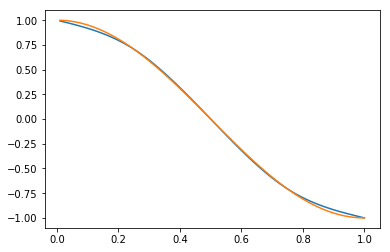

In [28]:
xplot = np.linspace(0.01,1,100)
CSyplot=[]
actualyplot = f_actual(xplot)
for x in xplot:
    CSyplot.append(cubic_spline_f(x,coeffs,xvals))
plt.plot(xplot, CSyplot)
plt.plot(xplot, actualyplot)